In [243]:
import math
import numpy as np
import matplotlib.pyplot as plt

#1
def ridge_genvals(n,d,sig):
    X = np.random.normal(loc=0.0, scale=1/math.sqrt(n), size=(n,d)) #nxd
    w0 = np.random.normal(loc=0.0, scale=1/math.sqrt(n), size=(d,1)) #dx1
    e = np.random.normal(loc=0, scale=sig, size=(n,1)) #nx1
    y = np.matmul(X,w0) + e #nx1
    return (y,w0,X)
#2
def estimate_ridge(X,y,lamda):
    n,d = X.shape
    xt = X.transpose() #dxn
    ID = np.identity(d) #dxd Identity matrix
    A = np.linalg.inv(np.matmul(xt,X) + lamda*ID) #dxd intermediate matrix
    w_est = np.matmul(np.matmul(A,xt),y) #dx1
    return w_est

In [244]:
ridge_genvals(200,100,0.03) #for n=200 and d=100

(array([[-0.08561004],
        [-0.04131161],
        [ 0.01582221],
        [-0.02075337],
        [ 0.06284462],
        [ 0.00963717],
        [ 0.03997153],
        [ 0.04689142],
        [-0.01295797],
        [-0.0009768 ],
        [-0.031614  ],
        [-0.02451888],
        [ 0.03637278],
        [-0.03428346],
        [ 0.04293507],
        [ 0.0765671 ],
        [ 0.01967029],
        [-0.08249182],
        [ 0.0190709 ],
        [-0.04686958],
        [-0.001033  ],
        [-0.04924953],
        [ 0.00301454],
        [ 0.09033224],
        [ 0.05548117],
        [ 0.0060094 ],
        [ 0.13676866],
        [ 0.04293366],
        [-0.04156809],
        [-0.07876277],
        [ 0.00589071],
        [ 0.00149328],
        [-0.06607867],
        [ 0.06400451],
        [ 0.13562588],
        [-0.06647835],
        [-0.01100459],
        [-0.00613905],
        [-0.07987056],
        [-0.00050597],
        [ 0.01225575],
        [ 0.02020619],
        [-0.00181956],
        [ 0

In [245]:
#3
def diff_generator(n,d,var):  
    
    y,w0,X = ridge_genvals(n,d,var)
    
    diff = []
    for lamda in np.linspace(0,1,100):
        w_est = estimate_ridge(X,y,lamda)
        diff.append(np.linalg.norm(w_est- w0))
    return diff

In [246]:
diff = diff_generator(200,100,0.03) #for n=200 and d=100

In [247]:
diff

[0.4307732494542403,
 0.41190871874564083,
 0.39595432269154124,
 0.38239558767336546,
 0.3708365338794008,
 0.36096580600935657,
 0.3525340589748793,
 0.3453384262621133,
 0.3392115873776156,
 0.3340139030756175,
 0.3296276452344268,
 0.3259526866123261,
 0.32290322694397167,
 0.32040526713501555,
 0.31839463194014334,
 0.3168154007158479,
 0.3156186460750255,
 0.31476140802906943,
 0.3142058506112172,
 0.3139185617087449,
 0.3138699666583963,
 0.31403383326460177,
 0.3143868510897377,
 0.3149082716946548,
 0.31557959936159496,
 0.31638432398093236,
 0.3173076894191428,
 0.31833649194416463,
 0.31945890426351425,
 0.32066432150057733,
 0.3219432260466308,
 0.32328706871780105,
 0.3246881640449784,
 0.3261395978511915,
 0.32763514554052625,
 0.3291691997469736,
 0.3307367061795415,
 0.33233310665841304,
 0.3339542884712626,
 0.33559653929325506,
 0.3372565070121271,
 0.33893116388377253,
 0.340617774516131,
 0.3423138672416905,
 0.3440172084930438,
 0.34572577984291963,
 0.347437757410

Text(0, 0.5, 'Distance between w_est and w0 -->')

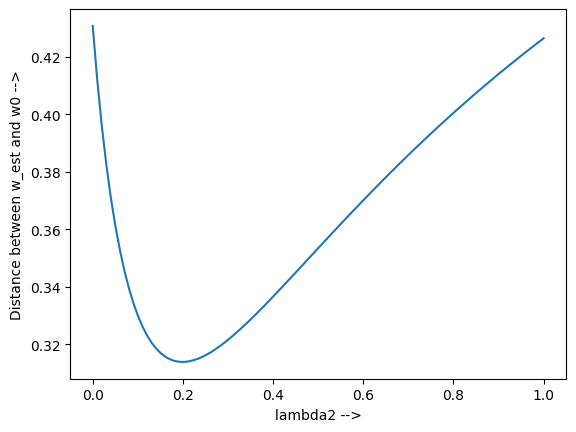

In [248]:
plt.plot(np.linspace(0,1,100), diff)
plt.xlabel("lambda2 -->")
plt.ylabel("Distance between w_est and w0 -->")

#### In the above plot where n=200, d=100 and for standard deviation = 0.03 we observe the bias-variance tradeoff. This is the same tradeoff that occurs when choosing the value of regularization parameter(lambda2).